<a href="https://colab.research.google.com/github/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/blob/main/Thivadee_Final_project_Alexa_reviews(1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up enviroment**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Import data**

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t',names=['rating','date','variation','message','class'])

In [ ]:
data_df.head()

,rating,date,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [ ]:
data_df['message'][0]

'verified_reviews'

In [ ]:
len(data_df['message'][1])

13

In [ ]:
data_df.shape

(3151, 5)

In [ ]:
data_df.columns

Index(['rating', 'date', 'variation', 'message', 'class'], dtype='object')

# **EDA**

In [ ]:
missing_values = ["n/a", "na", "--", "?"]
##Check "n/a", "na", "--", "?" values.

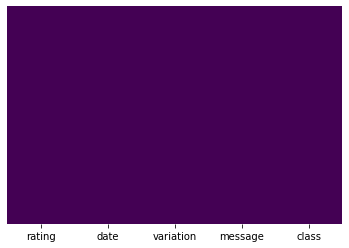

In [ ]:
sns.heatmap(data_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
##Check null/none values.

In [ ]:
data_df.isnull()
##Check null values.

,rating,date,variation,message,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False
3149,False,False,False,False,False


In [ ]:
data_df.describe()

,rating,date,variation,message,class
count,3151,3151,3151,3151,3151
unique,6,78,17,2302,3
top,5,30-Jul-18,Black Dot,,1
freq,2286,1603,516,79,2893


In [ ]:
!pip install pandas-profiling==2.7.1
import pandas_profiling as pp
pp.ProfileReport(data_df)
##Checking the overall summarry from the data. by doing this one is help me a lot by giving me quick summarry to understand the data in overall.

     |████████████████████████████████| 252 kB 5.5 MB/s 
     |████████████████████████████████| 58 kB 3.8 MB/s 
     |████████████████████████████████| 4.7 MB 34.1 MB/s 
     |████████████████████████████████| 675 kB 37.4 MB/s 
     |████████████████████████████████| 812 kB 47.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d333469874fefe3486551a3be951fad11a54ac05ad8419e12c15859b0e18f7ec
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=9a5ce89a77ad1d5205dd98e315daa1362c14e982666960d1dce8ab46e6d5b6d7
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

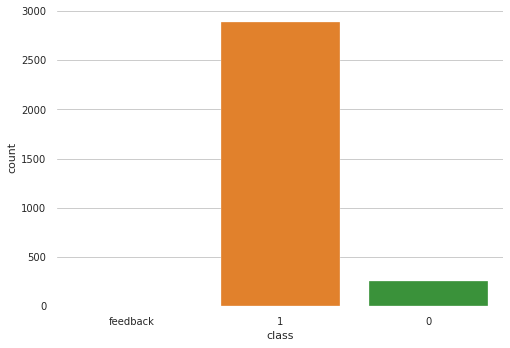

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='class', data=data_df)
##there is a lot of the class 1 much more than class 0

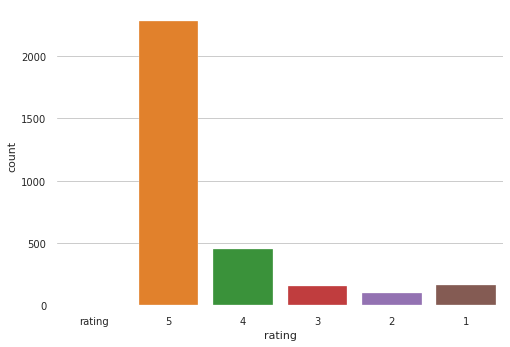

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='rating', data=data_df)
## From this chart I can see what is the most rating for the review which rate '5' and the lowest rate is rate '2'. Ps, rate 3 and rate 1 show pretty close high for the tall bar but acually the rate 1 is more than rate 3. rate 1 is 161 and rate 3 is 152 reviews. 

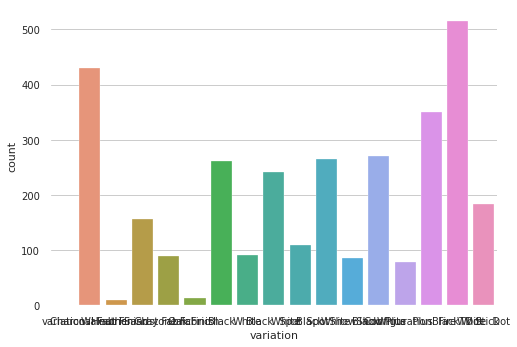

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='variation', data=data_df)
sns.set(rc={'figure.figsize':(30.7,25.27)})
##The was very small when first run this code and very hard to see the name tag below so, I have tgo adjust the size of the chart and now I can see that most popular color is Black dot and follow by the Charcoal fabric and so on.

# **Cleaning data**

In [ ]:
df1 = data_df.drop(['date', 'rating'],axis=1)

In [ ]:
df1

,variation,message,class
0,variation,verified_reviews,feedback
1,Charcoal Fabric,Love my Echo!,1
2,Charcoal Fabric,Loved it!,1
3,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
...,...,...,...
3146,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3147,Black Dot,"Listening to music, searching locations, check...",1
3148,Black Dot,"I do love these things, i have them running my...",1
3149,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
variation_drop = pd.get_dummies(df1['variation'], drop_first = True)

In [ ]:
variation_drop

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3149,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# first let's drop the column
df1.drop(['variation'], axis=1, inplace=True)

In [ ]:
df1 = pd.concat([df1, variation_drop], axis=1)

In [ ]:
df1

,message,class,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation
0,verified_reviews,feedback,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3149,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# **Model Building and Model building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
df_countvectorizer = vectorizer.fit_transform(df1['message'])


In [ ]:
df_countvectorizer.shape

(3151, 4045)

In [ ]:
type(df_countvectorizer)

scipy.sparse.csr.csr_matrix

In [ ]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(df_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# first let's drop the column
df1.drop(['message'], axis=1, inplace=True)
message = pd.DataFrame(df_countvectorizer.toarray())

In [ ]:
# Now let's concatenate them together
df1 = pd.concat([df1, message], axis=1)

In [ ]:
df1

,class,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,feedback,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3149,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's drop the target label coloumns
X = df1.drop(['class'],axis=1)




In [ ]:

X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3149,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df1['class']

Model Building & Training 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [ ]:
X_train.shape

(2520, 4061)

In [ ]:
X_test.shape

(631, 4061)

In [ ]:
y_train.shape

(2520,)

In [ ]:
y_test.shape

(631,)

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(criterion='entropy')

# **Model Evaluation**

In [ ]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


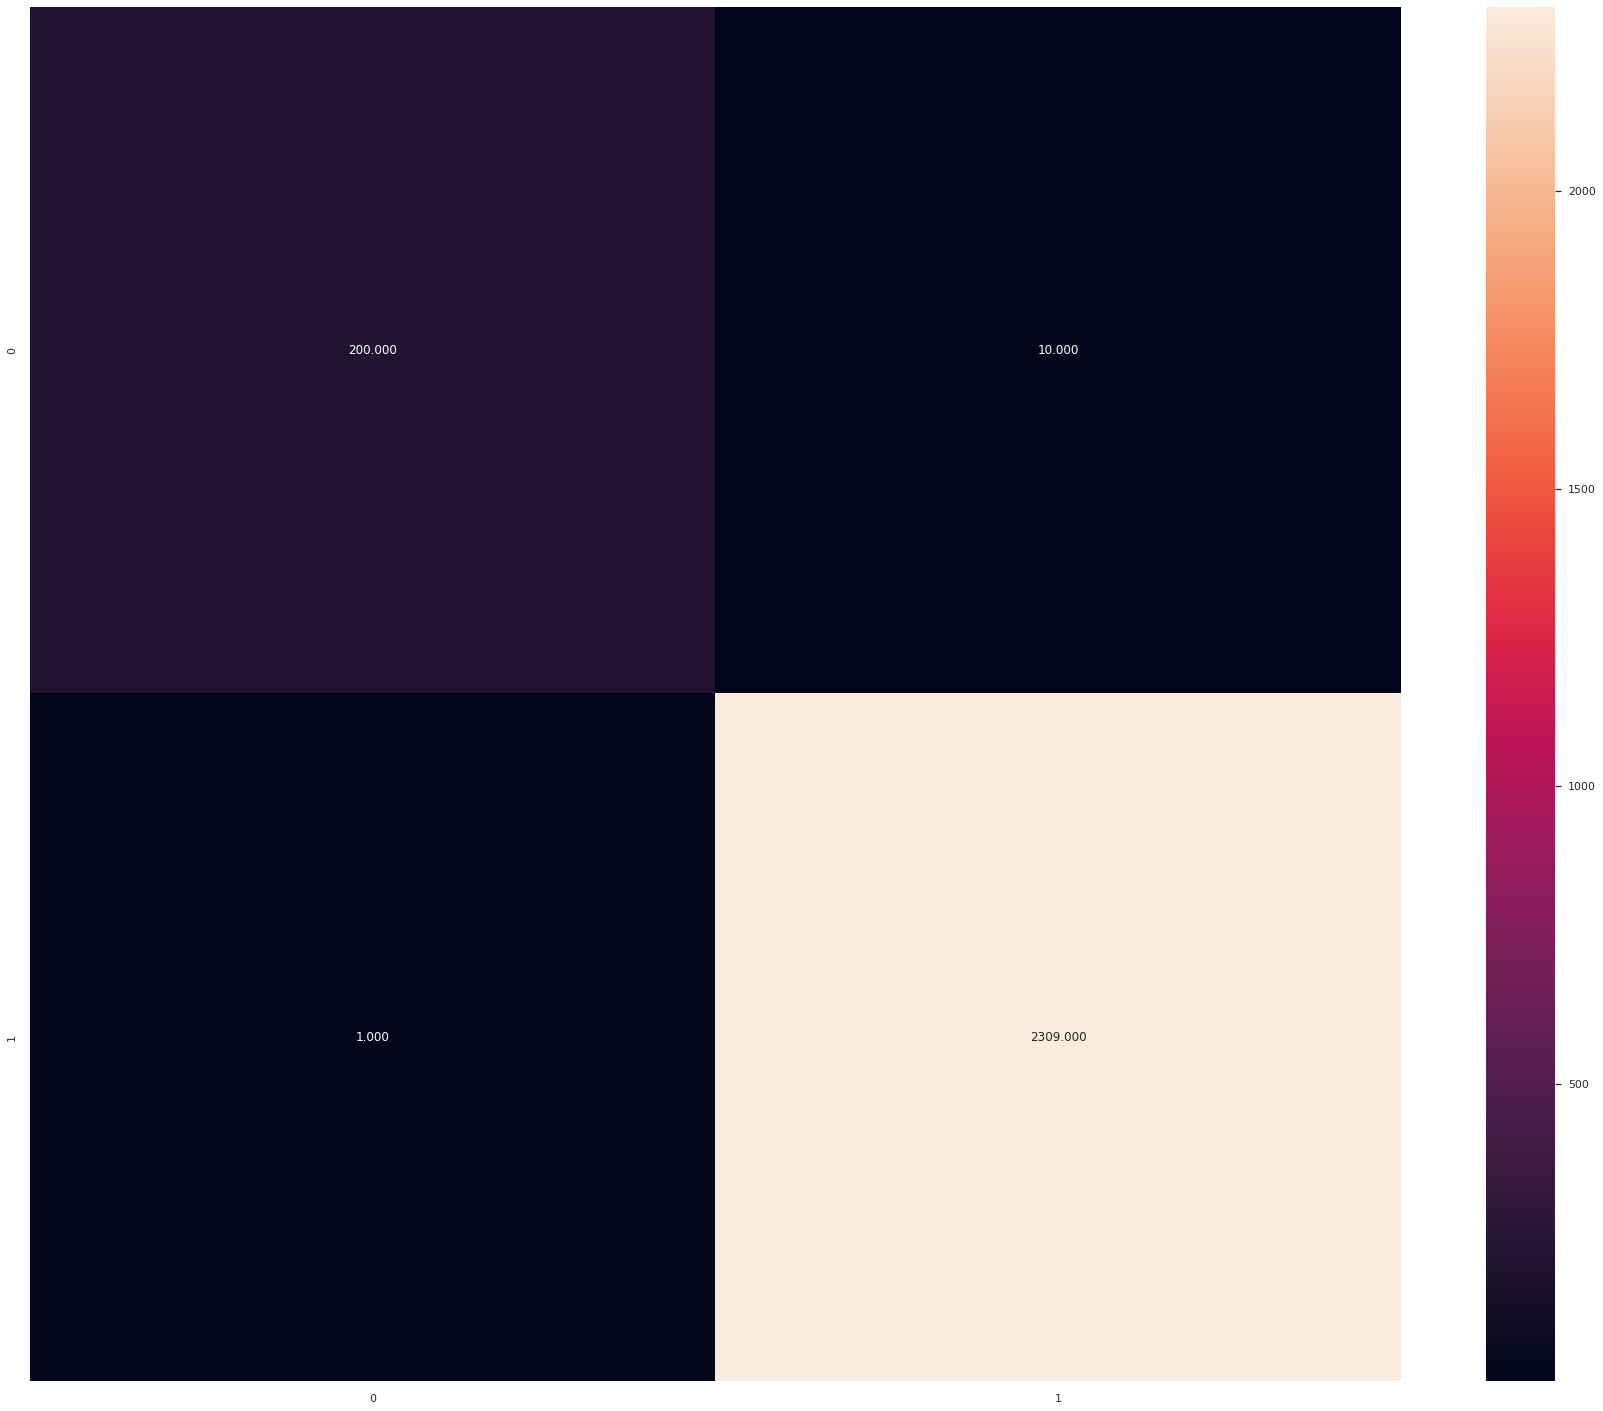

In [ ]:
sns.heatmap(cm, annot=True, fmt='0.03f')

In [ ]:
print(classification_report(y_train, y_predict_train))
## Result accuratcy at 1.0 = 100%

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       210
           1       1.00      1.00      1.00      2310

    accuracy                           1.00      2520
   macro avg       1.00      0.98      0.99      2520
weighted avg       1.00      1.00      1.00      2520



In [ ]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


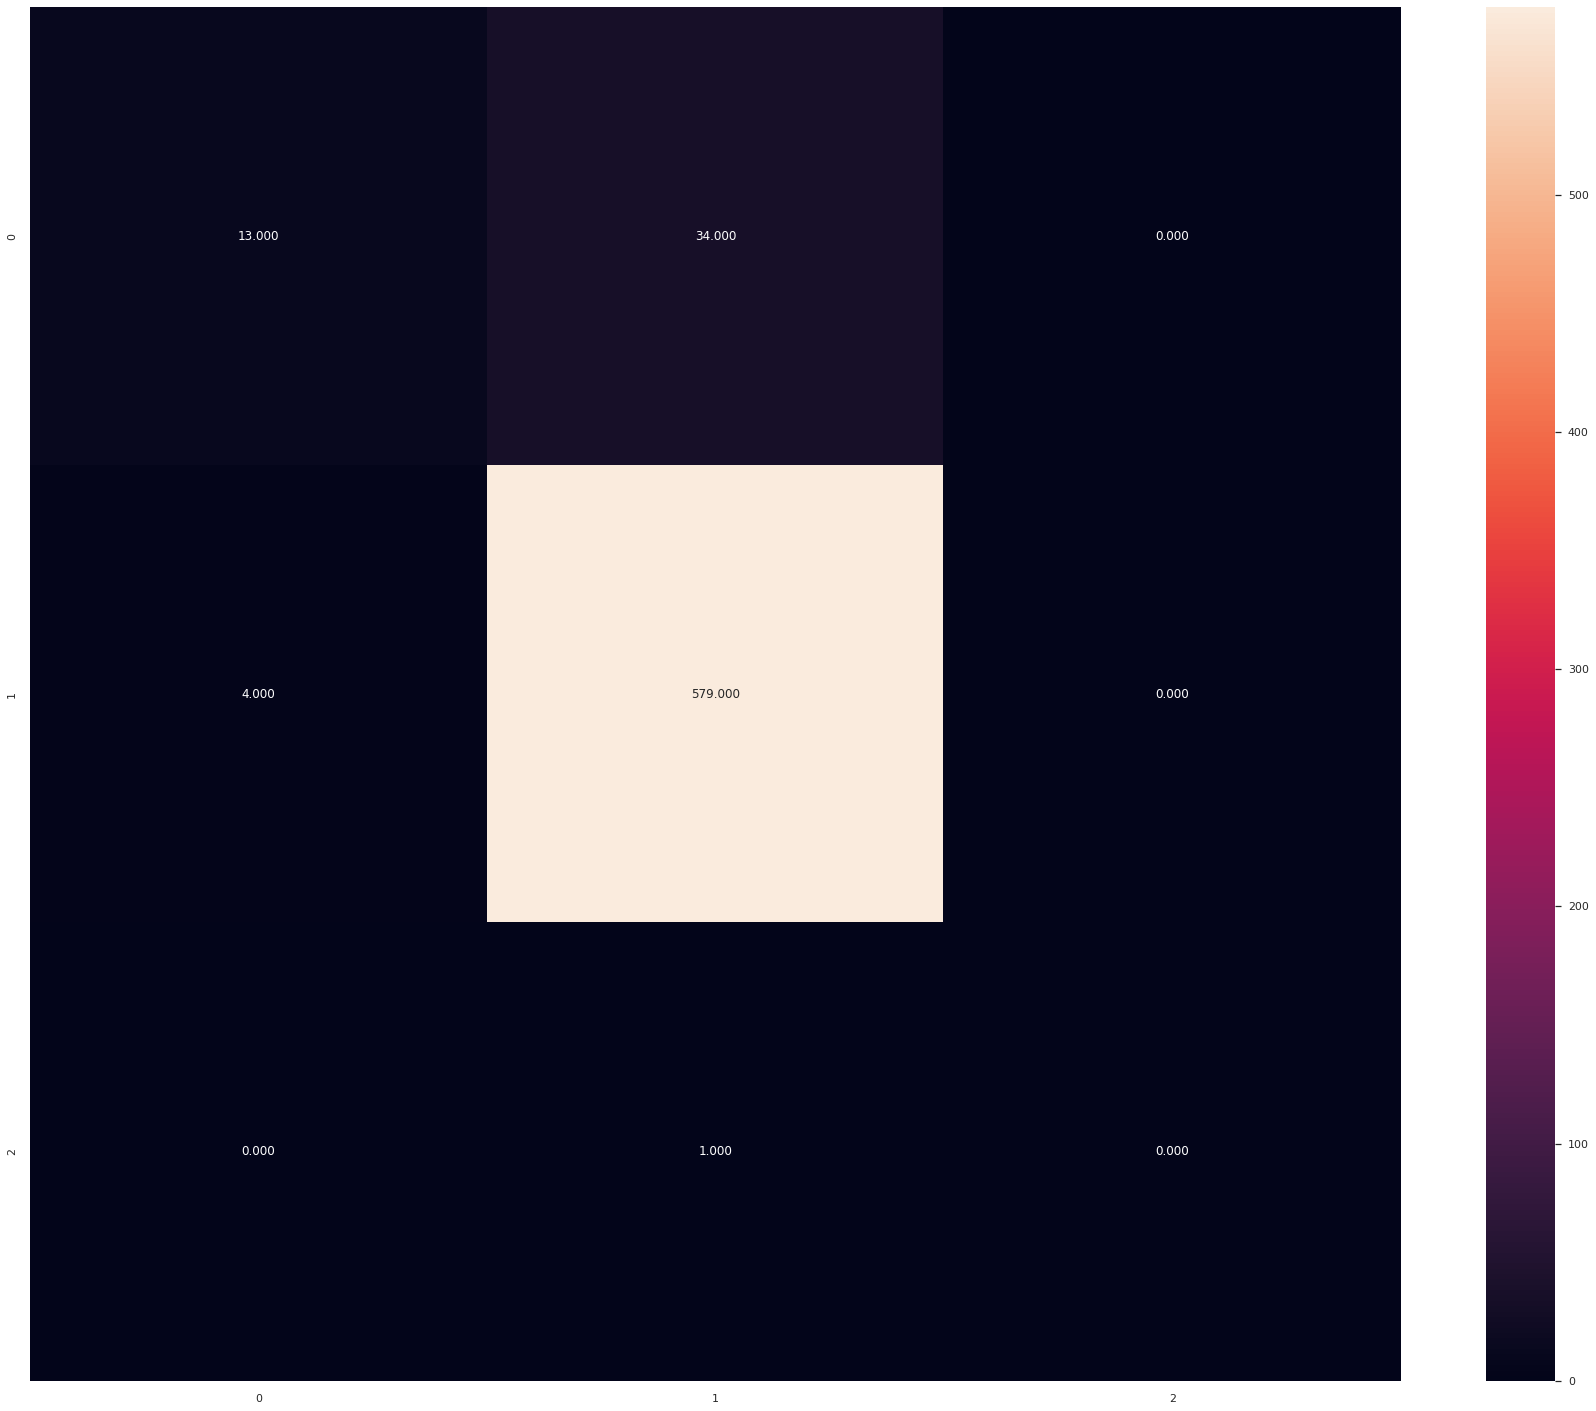

In [ ]:
sns.heatmap(cm, annot=True, fmt='0.03f')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.28      0.41        47
           1       0.94      0.99      0.97       583
    feedback       0.00      0.00      0.00         1

    accuracy                           0.94       631
   macro avg       0.57      0.42      0.46       631
weighted avg       0.93      0.94      0.92       631



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##NPL

In [ ]:
max(data_df['message'].apply(len))

2851

In [ ]:
data_df.shape

(3151, 5)

In [ ]:
import string

In [ ]:
remove_punct = [char for char in data_df.message.iloc[0] if char not in string.punctuation]

In [ ]:
remove_punct = ''.join(remove_punct)

In [ ]:
remove_punct

'verifiedreviews'

In [ ]:
len(remove_punct)

15

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]

In [ ]:
##Remove stopwards 
len(remove_stopwords)

1

In [ ]:
len(remove_punct)

15

In [ ]:
## Processing the data 
def message_text_pre_process(text_message):
  remove_punct = [char for char in text_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords


In [ ]:
data_df['message'].head(10).apply(message_text_pre_process)

0                                    [verifiedreviews]
1                                         [Love, Echo]
2                                              [Loved]
3    [Sometimes, playing, game, answer, question, c...
4    [lot, fun, thing, 4, yr, old, learns, dinosaur...
5                                              [Music]
6    [received, echo, gift, needed, another, Blueto...
7    [Without, cellphone, cannot, use, many, featur...
8    [think, 5th, one, Ive, purchased, Im, working,...
9                                       [looks, great]
Name: message, dtype: object

In [ ]:
data_df.head()

,rating,date,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [ ]:
data_df.shape

(3151, 5)

In [ ]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bag_of_words = CountVectorizer(analyzer=message_text_pre_process).fit(data_df['message'])

In [ ]:
bag_of_words_trf = bag_of_words.transform(data_df['message'])

In [ ]:
##TF-DIF
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [ ]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

In [ ]:
##Model Building
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data_df.head()

,rating,date,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [ ]:
spam_detector_model = MultinomialNB().fit(tfidf_trf,data_df['class'])

In [ ]:
test_message = data_df['message'][10]

In [ ]:
bag_of_words_test_message = bag_of_words.transform([test_message])

In [ ]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)
spam_detector_model.predict(tfidf_test_messsge)[0]

'1'

In [ ]:
data_df['class'][0]

'feedback'

In [ ]:
data_df.head()


,rating,date,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [ ]:
prediction_for_all_messages = spam_detector_model.predict(tfidf_trf)
from sklearn.metrics import classification_report
print(classification_report(data_df['class'],prediction_for_all_messages))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       257
           1       0.92      1.00      0.96      2893
    feedback       0.00      0.00      0.00         1

    accuracy                           0.92      3151
   macro avg       0.64      0.34      0.34      3151
weighted avg       0.93      0.92      0.89      3151



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data_df

,rating,date,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
...,...,...,...,...,...
3146,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3147,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3148,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3149,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
##Train Test  Split
from sklearn.model_selection import train_test_split
msg_train, msg_test, class_train, class_test = train_test_split(data_df['message'],data_df['class']) 

In [ ]:
print(msg_train.shape)
print(msg_test.shape)
print(class_train.shape)
print(class_test.shape)

(2363,)
(788,)
(2363,)
(788,)


In [ ]:
##Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
text_pipeline = Pipeline([
                          ('bag_of_words',CountVectorizer(analyzer=message_text_pre_process)),
                          ('tfidf',TfidfTransformer()),
                          ('classifier', MultinomialNB())
])

In [ ]:
text_pipeline.fit(msg_train,class_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function message_text_pre_process at 0x7f2e181b8560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
text_pred = text_pipeline.predict(msg_test)

In [ ]:
print(classification_report(text_pred,class_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95       788
    feedback       0.00      0.00      0.00         0

    accuracy                           0.91       788
   macro avg       0.33      0.30      0.32       788
weighted avg       1.00      0.91      0.95       788



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
msg_test.iloc[0]

'Love this little dot with a screen.  Super easy to set up and easy to use.  Instantly connected to all my other echo products.  I also bought the screen cover that has the blocking button for the camera if you want to use it.  Recommended.'

In [ ]:
class_test.iloc[0]

'1'

In [ ]:
cm_mnb = confusion_matrix(class_test,text_pred)

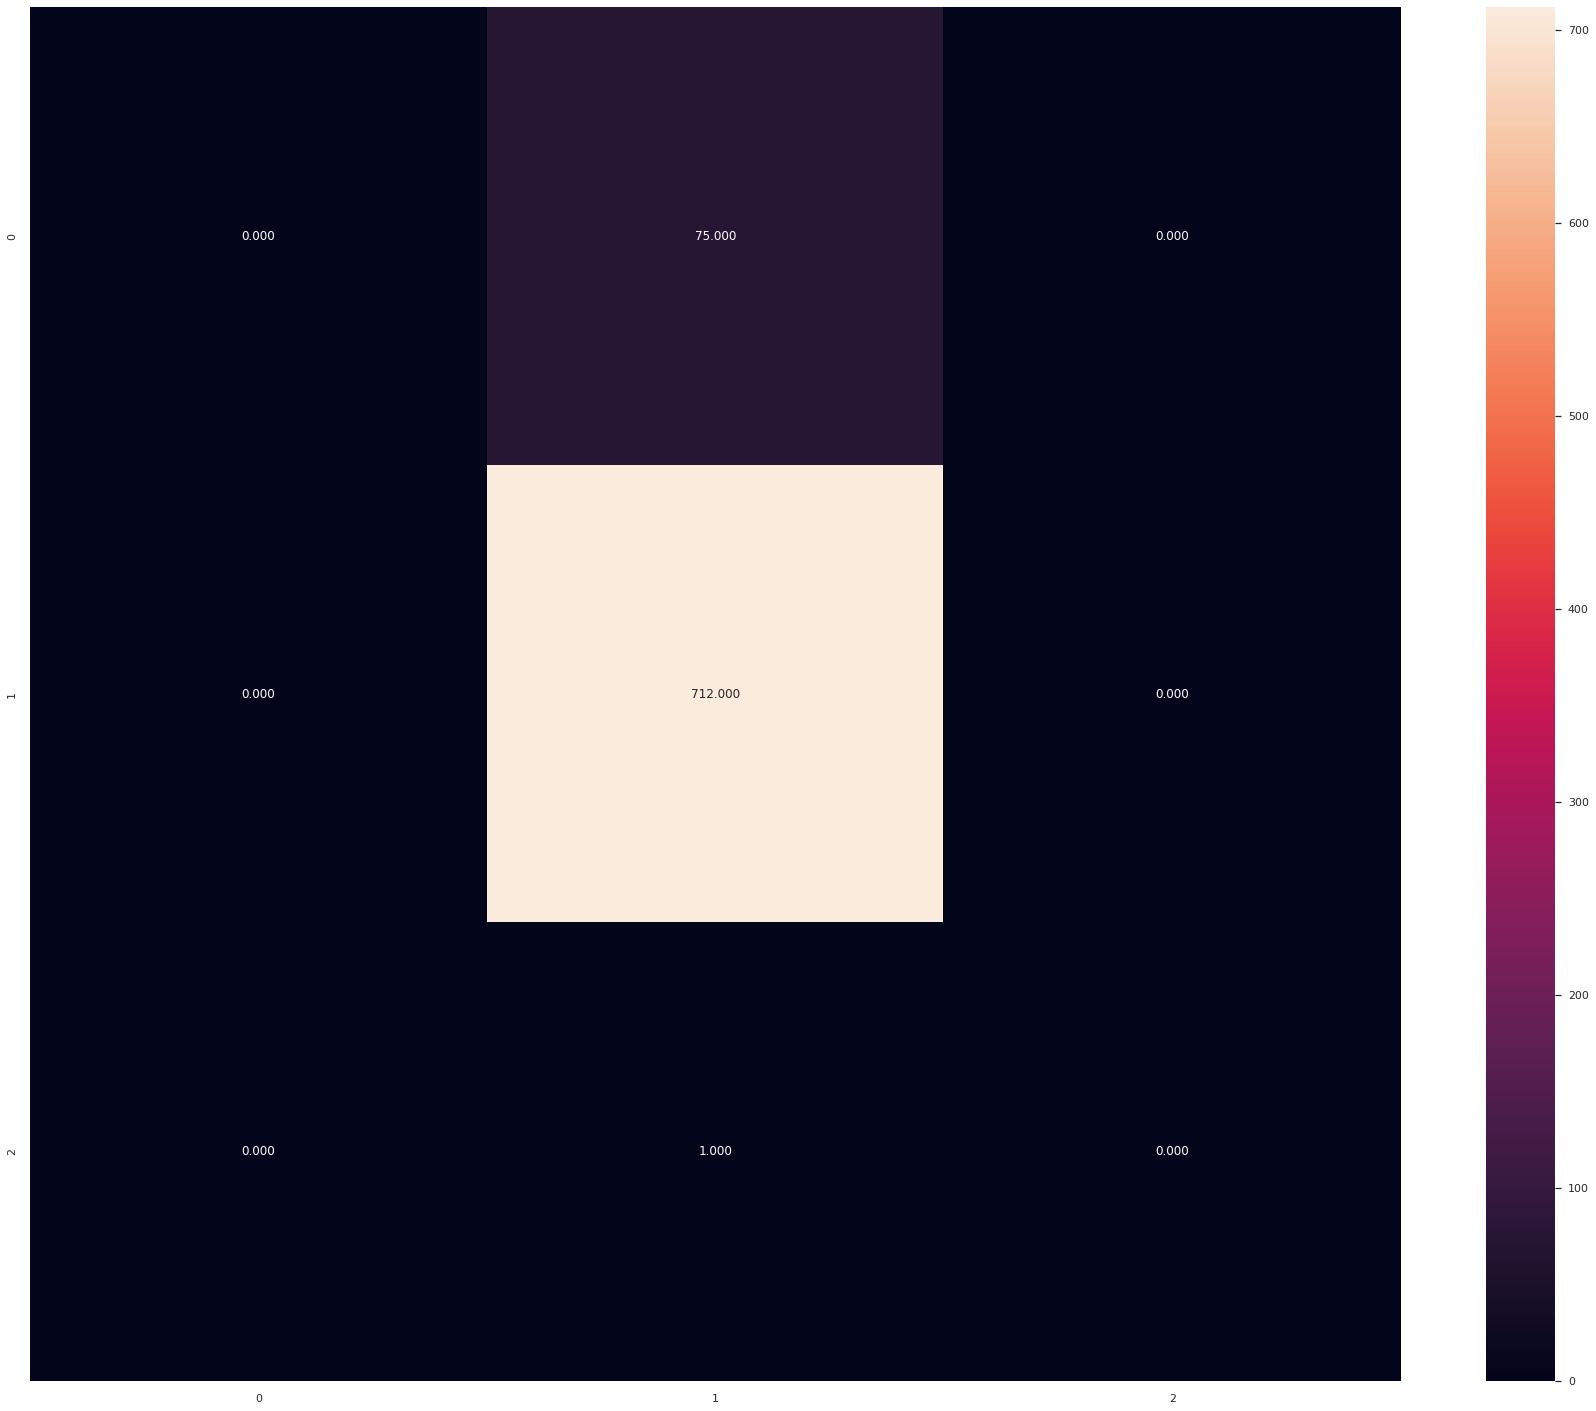

In [ ]:
sns.heatmap(cm_mnb, annot=True, fmt='0.03f')

In [ ]:
text_pred

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [ ]:
class_test.iloc[1]

'1'

In [ ]:
class_test

2511    1
90      1
198     1
1299    1
2504    1
       ..
1712    1
794     1
451     1
1597    1
1564    0
Name: class, Length: 788, dtype: object

In [ ]:
##faeature scaling 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'F1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'F2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [ ]:
x.head()

,F1,F2
0,19.659298,30.385695
1,20.489581,29.052770
2,20.400930,30.855172
3,21.806844,33.832089
4,21.371351,28.928854


In [ ]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['F1', 'F2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['F1', 'F2'])

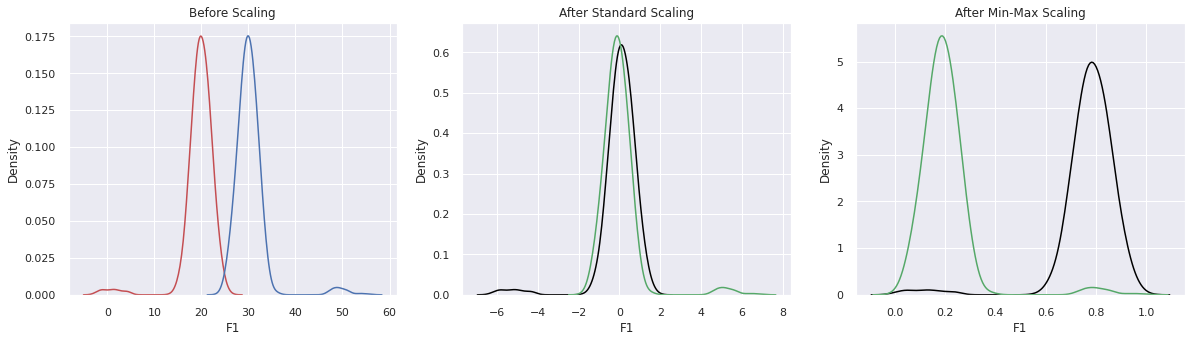

In [ ]:
 fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['F1'], ax = ax1, color ='r')
sns.kdeplot(x['F2'], ax = ax1, color ='b')

ax2.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['F1'], ax = ax2, color ='black')
sns.kdeplot(standard_df['F2'], ax = ax2, color ='g')
ax3.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['F1'], ax = ax3, color ='black')
sns.kdeplot(minmax_df['F2'], ax = ax3, color ='g')
plt.show()

Consuions : 
  Overall summary for this data regarding the review rate, for rate '5' is the top from total 3151 dataset which is 2286 reviews. and follow by the rate 4 = 455 reviews and rate 1 = 161 reviews and so on. 

  Also, I noticed that the difference for class 1 and 0 id the rate. for whoever give rate 1 to the Alexa product will be class at 0 and other rate 2,3,4,5  will be class at 1. that is why we have so much more class 1 in this data set.

  For the variation shown that top item is Black Dot for 516 and second, Charcoal Fabric for 430 and Fire TV stick 350 and other model.. but the least popular one is Walnut Finish which is pretty surprised me. because I think it's look pretty nice and classy..

  Regarding the ML result that I choosed forestrandom and NPL have the accuracy at 1.0 for Random forest and NPL 0.92 which is pretty high result. and I also did the feature scaling just ot tried it out and to see the different. 